# Data Reading and preprocessing

In [1]:
#import zipfile
#with zipfile.ZipFile('project3_COSC525.zip', 'r') as zip_ref:
    #zip_ref.extractall()
#zip_ref.close()



In [2]:
import numpy as np
np.random.seed(42)

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [4]:
pwd

'/nfs/home/aifeanyi/COSC_525/Project_3'

In [5]:

# Load the training data from a folder
train_dir = "/nfs/home/aifeanyi/COSC_525/Project_3/train"
val_dir = "/nfs/home/aifeanyi/COSC_525/Project_3/val"

num_train = len(os.listdir(train_dir))
num_val = len(os.listdir(val_dir))

num_train,num_val

(86744, 10954)

In [6]:
# Define an empty list to store the image data
img_data_train = []
path = []

# Loop over all files in the folder and load the images
for i in range(num_train):
    img_path = os.path.join(train_dir, f"{i+1}.jpg")
    path.append(img_path)
    img = load_img(img_path, color_mode="grayscale")
    img_array = img_to_array(img)
    img_data_train.append(img_array)

In [7]:
# Define an empty list to store the image data
img_data_val = []
    
# Loop over all files in the folder and load the images
for i in range(num_val):
    img_path = os.path.join(val_dir, f"{i+1}.jpg")
    img = load_img(img_path, color_mode="grayscale")
    img_array = img_to_array(img)
    img_data_val.append(img_array) 

In [8]:
# Convert the list of image arrays to a NumPy array
x_train = np.array(img_data_train)
x_test = np.array(img_data_val)

In [9]:
# Define the image size and number of channels
img_height, img_width, img_channels = x_train[0].shape

In [10]:
# Normalize the pixel values  per channel using min-max normalization
scaler = MinMaxScaler()
x_flat = x_train.reshape(-1, img_channels)
x_train = scaler.fit_transform(x_flat)
x_train = x_train.reshape(-1, img_height, img_width, img_channels)

# Normalize the pixel values using min-max normalization
x_test = scaler.transform(x_test.reshape(-1, img_channels))
x_test = x_test.reshape(-1, img_width, img_height, img_channels)

In [11]:
x_train.shape,x_test.shape

((86744, 32, 32, 1), (10954, 32, 32, 1))

In [12]:
train_label = pd.read_csv("fairface_label_train.csv")
val_label= pd.read_csv("fairface_label_val.csv")

In [13]:
# train_label.head()
val_label.head()
#len(train_label["gender"].unique())

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


In [14]:
train_label_ = train_label[["gender","race"]]
train_label_1 = train_label["gender"]
train_label_2 = train_label["race"]
val_label_ = val_label[["gender","race"]]
val_label_1 = val_label["gender"]
val_label_2 = val_label["race"]

In [15]:
train_label_2
#one hot encoding for gender
#train_label_ = pd.get_dummies(train_label_, columns=['gender'], drop_first=True)

0        East Asian
1            Indian
2             Black
3            Indian
4            Indian
            ...    
86739        Indian
86740        Indian
86741        Indian
86742         Black
86743         White
Name: race, Length: 86744, dtype: object

In [16]:
#categorical encoding for race
train_label_gender = pd.get_dummies(train_label_1, columns=['gender'])
train_label_race = pd.get_dummies(train_label_2, columns=['race'])

val_label_gender = pd.get_dummies(val_label_1, columns=['gender'])
val_label_race = pd.get_dummies(val_label_2, columns=['race'])


In [17]:
train_label_race

,Black,East Asian,Indian,Latino_Hispanic,Middle Eastern,Southeast Asian,White
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
86739,0,0,1,0,0,0,0
86740,0,0,1,0,0,0,0
86741,0,0,1,0,0,0,0
86742,1,0,0,0,0,0,0


In [18]:
y_train_both = np.array(train_label_)
y_val_both = np.array(val_label_)
y_gender_train = np.array(train_label_gender)
y_gender_val = np.array(val_label_gender)
y_race_train = np.array(train_label_race)
y_race_val = np.array(val_label_race)

# Task 1-A: Fully Connected Neural Network
## Label - gender

In [19]:
# import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
model_fully_gender = Sequential()
# Flatten the input image
model_fully_gender.add(Flatten(input_shape=input_shape)) 
# Add the first hidden layer
model_fully_gender.add(Dense(1024, activation='tanh'))
# Add the second hidden layer
model_fully_gender.add(Dense(512, activation='sigmoid'))
# Add the third hidden layer
model_fully_gender.add(Dense(100, activation='relu'))
#Add output layer
model_fully_gender.add(tf.keras.layers.Dense(y_gender_train.shape[1], activation='softmax'))



In [20]:
# !pip install graphviz
# !pip install pydot

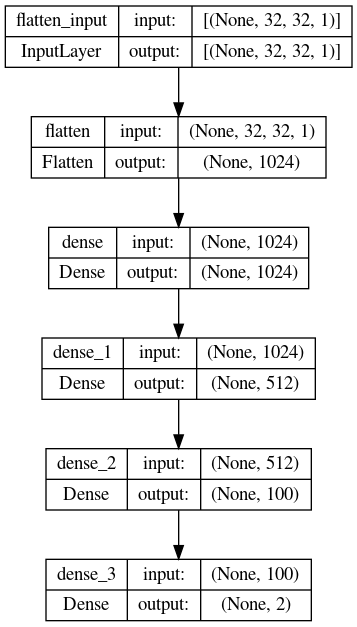

In [100]:
from tensorflow import keras
keras.utils.plot_model(model_fully_gender, 'Fc_gender.png', show_shapes=True)

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint
# define the checkpoint filepath
checkpoint_filepath = 'task1_gender_model.h5'

# create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=False
)

In [23]:
# Compile the model with categorical crossentropy loss, Adam optimizer with a learning rate of 0.001, and accuracy metrics
model_fully_gender.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
history = model_fully_gender.fit(x_train, y_gender_train, epochs=15, batch_size=64, validation_data=(x_test, y_gender_val), callbacks=[checkpoint])

Epoch 1/15
1356/1356 [==============================] - 7s 5ms/step - loss: 0.6249 - accuracy: 0.6418 - val_loss: 0.5828 - val_accuracy: 0.6756
Epoch 2/15
1356/1356 [==============================] - 6s 5ms/step - loss: 0.5757 - accuracy: 0.6844 - val_loss: 0.5516 - val_accuracy: 0.7072
Epoch 3/15
1356/1356 [==============================] - 6s 4ms/step - loss: 0.5615 - accuracy: 0.6943 - val_loss: 0.5611 - val_accuracy: 0.6987
Epoch 4/15
1356/1356 [==============================] - 6s 5ms/step - loss: 0.5506 - accuracy: 0.7019 - val_loss: 0.5446 - val_accuracy: 0.7173
Epoch 5/15
1356/1356 [==============================] - 6s 5ms/step - loss: 0.5424 - accuracy: 0.7095 - val_loss: 0.5422 - val_accuracy: 0.7201
Epoch 6/15
1356/1356 [==============================] - 6s 4ms/step - loss: 0.5367 - accuracy: 0.7128 - val_loss: 0.5360 - val_accuracy: 0.7173
Epoch 7/15
1356/1356 [==============================] - 6s 4ms/step - loss: 0.5309 - accuracy: 0.7184 - val_loss: 0.5253 - val_accuracy:

In [24]:
from tensorflow.keras.models import load_model
model_fully_gender = load_model('task1_gender_model.h5')

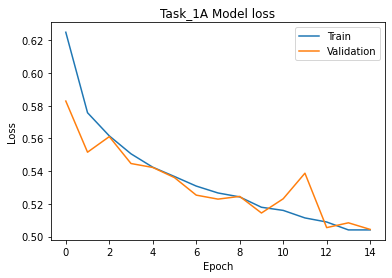

In [25]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_1A Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()




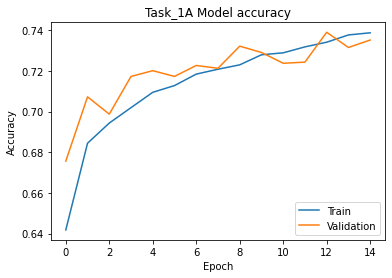

In [26]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_1A Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [27]:
# Evaluate the model on the test set
loss, accuracy = model_fully_gender.evaluate(x_test, y_gender_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))



343/343 [==============================] - 1s 1ms/step - loss: 0.5055 - accuracy: 0.7390
Final test set loss: 0.505
Final test set accuracy: 0.739


In [28]:
# Predict the classes of the test set
y_pred = np.argmax(model_fully_gender.predict(x_test), axis=-1)

y_true = np.argmax(y_gender_val, axis=1)
#np.argmax(y1_val, axis=1)
y_true

343/343 [==============================] - 0s 1ms/step


array([1, 0, 1, ..., 1, 0, 1])

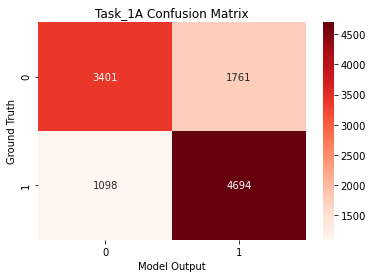

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Task_1A Confusion Matrix')
plt.xlabel('Model Output')
plt.ylabel('Ground Truth')
plt.show()

# Task 1-B: Fully Connected Neural Network
## Label - race

In [30]:
# import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
model_FC_race = Sequential()
# Flatten the input image
model_FC_race.add(Flatten(input_shape=input_shape)) 
# Add the first hidden layer
model_FC_race.add(Dense(1024, activation='tanh'))
# Add the second hidden layer
model_FC_race.add(Dense(512, activation='sigmoid'))
# Add the third hidden layer
model_FC_race.add(Dense(100, activation='relu'))
#Add output layer
model_FC_race.add(tf.keras.layers.Dense(y_race_train.shape[1], activation='softmax'))
model_FC_race.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 100)               51300     
                                                                 
 dense_7 (Dense)             (None, 7)                 707       
                                                                 
Total params: 1,626,407
Trainable params: 1,626,407
Non-trainable params: 0
_________________________________________________________________


In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint
# define the checkpoint filepath
checkpoint_filepath = 'task1_race_model.h5'

# create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=False
)

In [32]:
# Compile the model with categorical crossentropy loss, Adam optimizer with a learning rate of 0.001, and accuracy metrics
model_FC_race.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# Fit the model to the training data
# initial_epoch=20
history = model_FC_race.fit(x_train, y_race_train, epochs=10, batch_size=64, validation_data=(x_test, y_race_val), callbacks =[checkpoint] )

Epoch 1/10
1356/1356 [==============================] - 7s 5ms/step - loss: 1.7768 - accuracy: 0.2994 - val_loss: 1.6842 - val_accuracy: 0.3473
Epoch 2/10
1356/1356 [==============================] - 6s 5ms/step - loss: 1.6653 - accuracy: 0.3496 - val_loss: 1.6379 - val_accuracy: 0.3581
Epoch 3/10
1356/1356 [==============================] - 6s 5ms/step - loss: 1.6245 - accuracy: 0.3680 - val_loss: 1.6222 - val_accuracy: 0.3688
Epoch 4/10
1356/1356 [==============================] - 6s 4ms/step - loss: 1.6032 - accuracy: 0.3763 - val_loss: 1.6525 - val_accuracy: 0.3533
Epoch 5/10
1356/1356 [==============================] - 6s 5ms/step - loss: 1.5857 - accuracy: 0.3834 - val_loss: 1.6189 - val_accuracy: 0.3695
Epoch 6/10
1356/1356 [==============================] - 6s 5ms/step - loss: 1.5774 - accuracy: 0.3864 - val_loss: 1.5760 - val_accuracy: 0.3878
Epoch 7/10
1356/1356 [==============================] - 6s 5ms/step - loss: 1.5608 - accuracy: 0.3949 - val_loss: 1.5713 - val_accuracy:

In [34]:
#load the trained Model
model_fc_race = load_model('task1_race_model.h5')

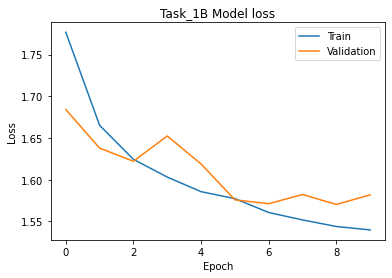

In [35]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_1B Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()





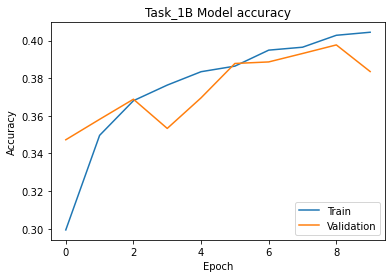

In [36]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_1B Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [37]:
# Evaluate the model on the test set
loss, accuracy = model_fc_race.evaluate(x_test, y_race_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))

343/343 [==============================] - 1s 1ms/step - loss: 1.5704 - accuracy: 0.3977
Final test set loss: 1.570
Final test set accuracy: 0.398


In [38]:
# Predict the classes of the test set
y_pred = np.argmax(model_fc_race.predict(x_test), axis=-1)

y_true = np.argmax(y_race_val, axis=1)
#np.argmax(y1_val, axis=1)
y_true

343/343 [==============================] - 0s 1ms/step


array([1, 1, 6, ..., 3, 1, 3])

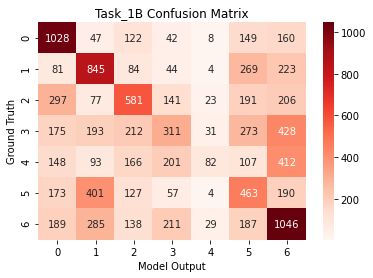

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Task_1B Confusion Matrix')
plt.xlabel('Model Output')
plt.ylabel('Ground Truth')
plt.show()

# Task 2-A: Convolutional Neural Network
## Label - gender

In [91]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
model_conv_gender = Sequential()
model_conv_gender.add(Conv2D(40, (5, 5), activation='relu', input_shape=input_shape)) 
model_conv_gender.add(MaxPooling2D((2, 2)))
model_conv_gender.add(Flatten())
model_conv_gender.add(Dense(100, activation='relu'))
model_conv_gender.add(Dense(y_gender_train.shape[1], activation='softmax'))
model_conv_gender.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 40)        1040      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 7840)              0         
                                                                 
 dense_22 (Dense)            (None, 100)               784100    
                                                                 
 dense_23 (Dense)            (None, 2)                 202       
                                                                 
Total params: 785,342
Trainable params: 785,342
Non-trainable params: 0
________________________________________________

In [92]:
# define the checkpoint filepath
checkpoint_filepath = 'task2_gender_model.h5'

# create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=False
)

In [93]:
#compile model
model_conv_gender.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit the model to the training data
history = model_conv_gender.fit(x_train, y_gender_train, epochs=15, batch_size=64, validation_data=(x_test, y_gender_val), callbacks =[checkpoint])

Epoch 1/15
1356/1356 [==============================] - 8s 5ms/step - loss: 0.5485 - accuracy: 0.7121 - val_loss: 0.4797 - val_accuracy: 0.7666
Epoch 2/15
1356/1356 [==============================] - 6s 5ms/step - loss: 0.4691 - accuracy: 0.7656 - val_loss: 0.4717 - val_accuracy: 0.7568
Epoch 3/15
1356/1356 [==============================] - 6s 5ms/step - loss: 0.4348 - accuracy: 0.7877 - val_loss: 0.4522 - val_accuracy: 0.7689
Epoch 4/15
1356/1356 [==============================] - 6s 5ms/step - loss: 0.4135 - accuracy: 0.8006 - val_loss: 0.4246 - val_accuracy: 0.7878
Epoch 5/15
1356/1356 [==============================] - 6s 5ms/step - loss: 0.3947 - accuracy: 0.8099 - val_loss: 0.4217 - val_accuracy: 0.7983
Epoch 6/15
1356/1356 [==============================] - 7s 5ms/step - loss: 0.3787 - accuracy: 0.8201 - val_loss: 0.4084 - val_accuracy: 0.8009
Epoch 7/15
1356/1356 [==============================] - 6s 5ms/step - loss: 0.3635 - accuracy: 0.8292 - val_loss: 0.4213 - val_accuracy:

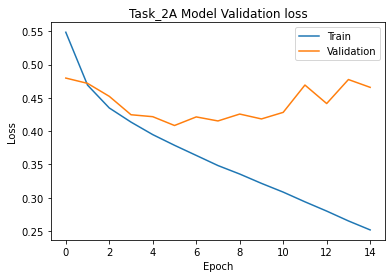

In [94]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
# plt.plot(history.history['loss'])
# plt.title('Task_2A Model Training loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_2A Model Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

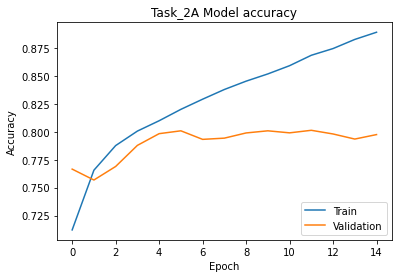

In [95]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_2A Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [96]:
model_conv_gender = load_model('task2_gender_model.h5')

In [97]:
# Evaluate the model on the test set
loss, accuracy = model_conv_gender.evaluate(x_test, y_gender_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))

343/343 [==============================] - 1s 1ms/step - loss: 0.4692 - accuracy: 0.8014
Final test set loss: 0.469
Final test set accuracy: 0.801


In [98]:
# Predict the classes of the test set
y_pred = np.argmax(model_conv_gender.predict(x_test), axis=-1)

y_true = np.argmax(y_gender_val, axis=1)
y_true

343/343 [==============================] - 1s 1ms/step


array([1, 0, 1, ..., 1, 0, 1])

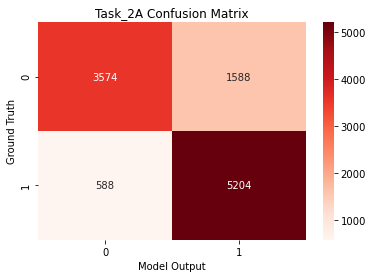

In [99]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Task_2A Confusion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Model Output')
plt.show()

# Task 2-B: Convolutional Neural Network
## Label - race

In [49]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
model_conv_race = Sequential()
model_conv_race.add(Conv2D(40, (5, 5), activation='relu', input_shape=input_shape)) 
model_conv_race.add(MaxPooling2D((2, 2)))
model_conv_race.add(Flatten())
model_conv_race.add(Dense(100, activation='relu'))
model_conv_race.add(Dense(y_race_train.shape[1], activation='softmax'))
model_conv_race.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 40)        1040      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 7840)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               784100    
                                                                 
 dense_11 (Dense)            (None, 7)                 707       
                                                                 
Total params: 785,847
Trainable params: 785,847
Non-trainable params: 0
________________________________________________

In [50]:
# define the checkpoint filepath
checkpoint_filepath = 'task2_race_model.h5'

# create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=False
)

In [51]:
#compile model
model_conv_race.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit the model to the training data
history = model_conv_race.fit(x_train, y_race_train, epochs=15, batch_size=128, validation_data=(x_test, y_race_val), callbacks = [checkpoint])

Epoch 1/15
678/678 [==============================] - 5s 7ms/step - loss: 1.6637 - accuracy: 0.3565 - val_loss: 1.5370 - val_accuracy: 0.4143
Epoch 2/15
678/678 [==============================] - 5s 7ms/step - loss: 1.4858 - accuracy: 0.4330 - val_loss: 1.4779 - val_accuracy: 0.4344
Epoch 3/15
678/678 [==============================] - 5s 7ms/step - loss: 1.4043 - accuracy: 0.4632 - val_loss: 1.4141 - val_accuracy: 0.4576
Epoch 4/15
678/678 [==============================] - 5s 7ms/step - loss: 1.3499 - accuracy: 0.4822 - val_loss: 1.3812 - val_accuracy: 0.4679
Epoch 5/15
678/678 [==============================] - 5s 7ms/step - loss: 1.3094 - accuracy: 0.5005 - val_loss: 1.4047 - val_accuracy: 0.4615
Epoch 6/15
678/678 [==============================] - 5s 7ms/step - loss: 1.2741 - accuracy: 0.5136 - val_loss: 1.3708 - val_accuracy: 0.4708
Epoch 7/15
678/678 [==============================] - 5s 7ms/step - loss: 1.2414 - accuracy: 0.5260 - val_loss: 1.3528 - val_accuracy: 0.4818
Epoch 

In [52]:
model_conv_race = load_model('task2_race_model.h5')

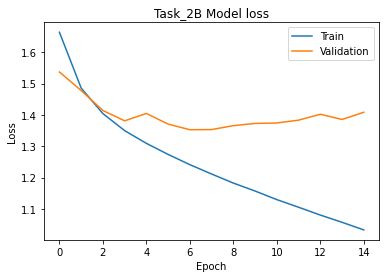

In [53]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_2B Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

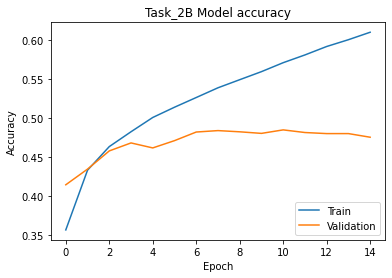

In [54]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_2B Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [55]:
# Evaluate the model on the test set
loss, accuracy = model_conv_race.evaluate(x_test, y_race_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))

343/343 [==============================] - 1s 1ms/step - loss: 1.3743 - accuracy: 0.4846
Final test set loss: 1.374
Final test set accuracy: 0.485


In [56]:
# Predict the classes of the test set
y_pred = np.argmax(model_conv_race.predict(x_test), axis=-1)

y_true = np.argmax(y_race_val, axis=1)
#np.argmax(y1_val, axis=1)
y_true

343/343 [==============================] - 1s 1ms/step


array([1, 1, 6, ..., 3, 1, 3])

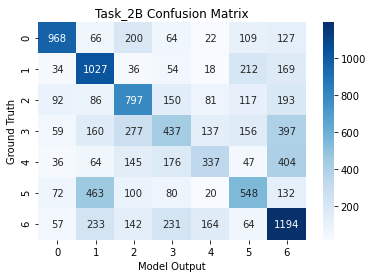

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Task_2B Confusion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Model Output')
plt.show()

# Task 3-A: Custom Convolutional Neural Network
## Label - gender

In [58]:
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
my_conv_gender = Sequential()
# Flatten the input image
my_conv_gender.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape)) 
my_conv_gender.add(MaxPooling2D((2, 2)))
my_conv_gender.add(Conv2D(64, (3, 3), activation='relu')) 
my_conv_gender.add(MaxPooling2D((2, 2)))
my_conv_gender.add(Flatten())
my_conv_gender.add(Dense(300, activation='relu'))
my_conv_gender.add(Dense(100, activation='relu'))
my_conv_gender.add(Dense(25, activation='relu'))
my_conv_gender.add(Dense(y_gender_train.shape[1], activation='softmax'))
my_conv_gender.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_12 (Dense)            (None, 300)              

In [59]:
# define the checkpoint filepath
checkpoint_filepath = 'task3_gender_model.h5'

# create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=False
)

In [60]:
#compile model
my_conv_gender.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit the model to the training data
history = my_conv_gender.fit(x_train, y_gender_train, epochs=15, batch_size=64, validation_data=(x_test, y_gender_val), callbacks= [checkpoint])

Epoch 1/15
1356/1356 [==============================] - 10s 7ms/step - loss: 0.5332 - accuracy: 0.7180 - val_loss: 0.4602 - val_accuracy: 0.7720
Epoch 2/15
1356/1356 [==============================] - 9s 7ms/step - loss: 0.4435 - accuracy: 0.7807 - val_loss: 0.4320 - val_accuracy: 0.7852
Epoch 3/15
1356/1356 [==============================] - 9s 7ms/step - loss: 0.4048 - accuracy: 0.8043 - val_loss: 0.4101 - val_accuracy: 0.8008
Epoch 4/15
1356/1356 [==============================] - 9s 7ms/step - loss: 0.3774 - accuracy: 0.8202 - val_loss: 0.4277 - val_accuracy: 0.7901
Epoch 5/15
1356/1356 [==============================] - 9s 7ms/step - loss: 0.3528 - accuracy: 0.8336 - val_loss: 0.4120 - val_accuracy: 0.8037
Epoch 6/15
1356/1356 [==============================] - 9s 7ms/step - loss: 0.3292 - accuracy: 0.8475 - val_loss: 0.3931 - val_accuracy: 0.8129
Epoch 7/15
1356/1356 [==============================] - 9s 6ms/step - loss: 0.3054 - accuracy: 0.8596 - val_loss: 0.3974 - val_accuracy

In [61]:
my_conv_gender = load_model('task3_gender_model.h5')

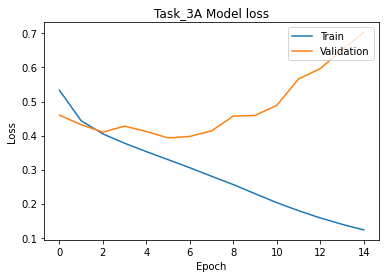

In [62]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_3A Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

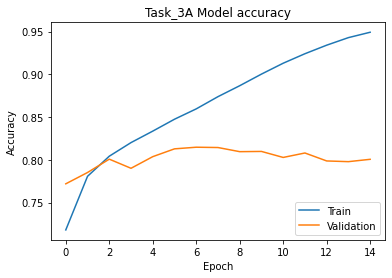

In [63]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_3A Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [64]:
# Evaluate the model on the test set
loss, accuracy = my_conv_gender.evaluate(x_test, y_gender_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))



343/343 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8148
Final test set loss: 0.397
Final test set accuracy: 0.815


In [65]:
# Predict the classes of the test set
y_pred = np.argmax(my_conv_gender.predict(x_test), axis=-1)

y_true = np.argmax(y_gender_val, axis=1)
#np.argmax(y1_val, axis=1)
y_true

343/343 [==============================] - 1s 2ms/step


array([1, 0, 1, ..., 1, 0, 1])

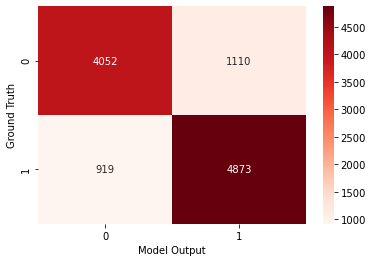

In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.ylabel('Ground Truth')
plt.xlabel('Model Output')
plt.show()

# Task 3-B: Custom Convolutional Neural Network
## Label - race

In [67]:
input_shape = (img_height, img_width, img_channels)
# Define the model architecture
my_conv_race = Sequential()
# Flatten the input image
my_conv_race.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape)) 
my_conv_race.add(MaxPooling2D((2, 2)))
my_conv_race.add(Conv2D(64, (3, 3), activation='relu')) 
my_conv_race.add(MaxPooling2D((2, 2)))
my_conv_race.add(Flatten())
my_conv_race.add(Dense(300, activation='relu'))
my_conv_race.add(Dense(100, activation='relu'))
my_conv_race.add(Dense(25, activation='relu'))
my_conv_race.add(Dense(y_race_train.shape[1], activation='softmax'))
my_conv_race.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_16 (Dense)            (None, 300)              

In [68]:
# define the checkpoint filepath
checkpoint_filepath = 'task3_race_model.h5'

# create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=False
)

In [69]:
#compile model
my_conv_race.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [70]:
# Fit the model to the training data
history = my_conv_race.fit(x_train, y_race_train, epochs=15, batch_size=64, validation_data=(x_test, y_race_val), callbacks=[checkpoint])

Epoch 1/15
1356/1356 [==============================] - 10s 7ms/step - loss: 1.6317 - accuracy: 0.3614 - val_loss: 1.4520 - val_accuracy: 0.4364
Epoch 2/15
1356/1356 [==============================] - 9s 6ms/step - loss: 1.4036 - accuracy: 0.4579 - val_loss: 1.3472 - val_accuracy: 0.4805
Epoch 3/15
1356/1356 [==============================] - 9s 6ms/step - loss: 1.3147 - accuracy: 0.4925 - val_loss: 1.3166 - val_accuracy: 0.4912
Epoch 4/15
1356/1356 [==============================] - 8s 6ms/step - loss: 1.2483 - accuracy: 0.5189 - val_loss: 1.3019 - val_accuracy: 0.4898
Epoch 5/15
1356/1356 [==============================] - 9s 6ms/step - loss: 1.1954 - accuracy: 0.5402 - val_loss: 1.2929 - val_accuracy: 0.5034
Epoch 6/15
1356/1356 [==============================] - 9s 7ms/step - loss: 1.1460 - accuracy: 0.5579 - val_loss: 1.2806 - val_accuracy: 0.5084
Epoch 7/15
1356/1356 [==============================] - 8s 6ms/step - loss: 1.0960 - accuracy: 0.5773 - val_loss: 1.2979 - val_accuracy

In [71]:
my_conv_race = load_model('task3_race_model.h5')

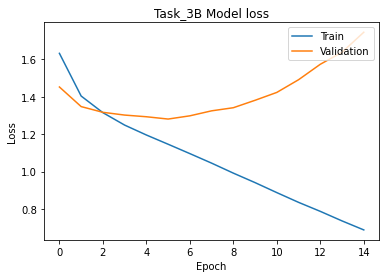

In [72]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_3B Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

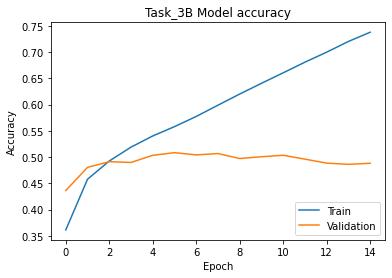

In [73]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Task_3B Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [74]:
# Evaluate the model on the test set
loss, accuracy = my_conv_race.evaluate(x_test, y_race_val)

print("Final test set loss: {:.3f}".format(loss))
print("Final test set accuracy: {:.3f}".format(accuracy))

343/343 [==============================] - 1s 2ms/step - loss: 1.2806 - accuracy: 0.5084
Final test set loss: 1.281
Final test set accuracy: 0.508


In [75]:
# Predict the classes of the test set
y_pred = np.argmax(my_conv_race.predict(x_test), axis=-1)

y_true = np.argmax(y_race_val, axis=1)
#np.argmax(y1_val, axis=1)
y_true

343/343 [==============================] - 1s 2ms/step


array([1, 1, 6, ..., 3, 1, 3])

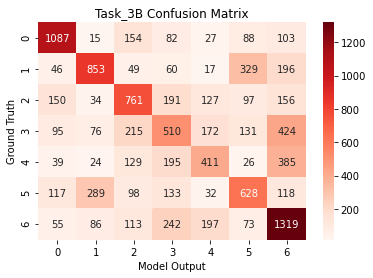

In [76]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Task_3B Confusion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Model Output')
plt.show()

# Task 4: Custom Convolutional Neural Network
## Labels - Gender and Race

In [77]:
from tensorflow.keras.layers import Input, Dense, Concatenate, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model

input_shape = (img_height, img_width, img_channels)

# Define input layer
input_layer = Input(shape=(input_shape))

# Define shared hidden layers
layer_1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
layer_2 = Conv2D(64, (3, 3), activation='relu')(layer_1)
layer_3 = MaxPooling2D( (3, 3))(layer_2)
layer_4 = Conv2D(128, (3, 3), activation='relu')(layer_3)
layer_5 = Conv2D(256, (3, 3), activation='relu')(layer_4)
layer_6 = MaxPooling2D( (3, 3))(layer_5)

layer_7 = Flatten()(layer_6)
layer_8 = Dense(64, activation='relu')(layer_7)
layer_9 = Dense(32, activation='relu')(layer_8)

# Define gender output layer
gender_output = Dense(y_gender_train.shape[1], activation='softmax', name='gender_output')(layer_9)

# Define race output layer
race_output = Dense(y_race_train.shape[1], activation='softmax', name='race_output')(layer_9)

# Concatenate the output layers
# output_layer = Concatenate()([gender_output, race_output])

# Define the model with multiple outputs
model_combined = Model(inputs=input_layer, outputs=[gender_output, race_output])



model_combined.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 30, 30, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_6[0][0]']               
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_7[0][0]']               
                                                                                              

In [78]:
# define the checkpoint filepath
checkpoint_filepath = 'task4_gender_race_model.h5'

# create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_race_output_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=False
)

In [79]:
# Compile the model with appropriate loss functions for both tasks

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_combined.compile(optimizer=opt, loss={'gender_output': 'categorical_crossentropy', 'race_output': 'categorical_crossentropy'},
              metrics='accuracy')

In [80]:
# Train the model on the dataset
history = model_combined.fit(x_train, {'gender_output': y_gender_train, 'race_output': y_race_train}, epochs=10, batch_size=64, validation_data=(x_test, {'gender_output': y_gender_val, 'race_output': y_race_val}), callbacks = [checkpoint])

Epoch 1/10
1356/1356 [==============================] - 21s 14ms/step - loss: 2.2957 - gender_output_loss: 0.5940 - race_output_loss: 1.7017 - gender_output_accuracy: 0.6617 - race_output_accuracy: 0.3297 - val_loss: 2.0291 - val_gender_output_loss: 0.5074 - val_race_output_loss: 1.5217 - val_gender_output_accuracy: 0.7448 - val_race_output_accuracy: 0.4035
Epoch 2/10
1356/1356 [==============================] - 19s 14ms/step - loss: 1.9472 - gender_output_loss: 0.4846 - race_output_loss: 1.4626 - gender_output_accuracy: 0.7552 - race_output_accuracy: 0.4306 - val_loss: 1.9003 - val_gender_output_loss: 0.4797 - val_race_output_loss: 1.4206 - val_gender_output_accuracy: 0.7571 - val_race_output_accuracy: 0.4457
Epoch 3/10
1356/1356 [==============================] - 19s 14ms/step - loss: 1.8196 - gender_output_loss: 0.4459 - race_output_loss: 1.3737 - gender_output_accuracy: 0.7803 - race_output_accuracy: 0.4649 - val_loss: 1.8006 - val_gender_output_loss: 0.4407 - val_race_output_loss:

In [81]:
model_combined = load_model('task4_gender_race_model.h5')

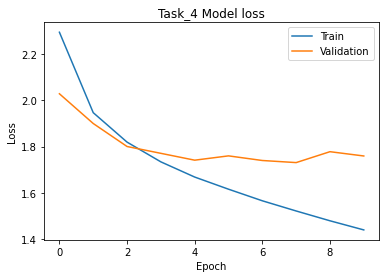

In [82]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Task_4 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

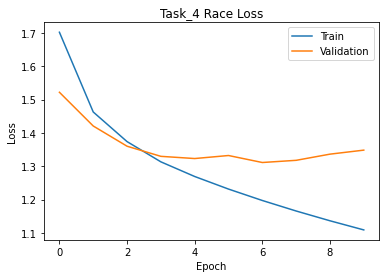

In [83]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['race_output_loss'])
plt.plot(history.history['val_race_output_loss'])
plt.title('Task_4 Race Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

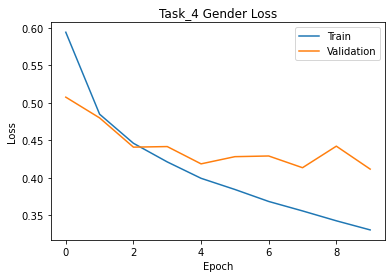

In [84]:
import matplotlib.pyplot as plt
# Plot the training and validation loss for each epoch
plt.plot(history.history['gender_output_loss'])
plt.plot(history.history['val_gender_output_loss'])
plt.title('Task_4 Gender Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

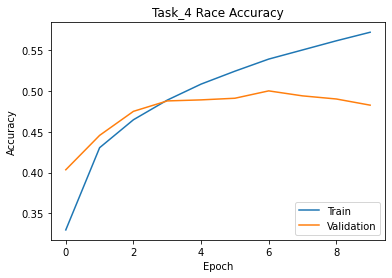

In [85]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['race_output_accuracy'])
plt.plot(history.history['val_race_output_accuracy'])
plt.title('Task_4 Race Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

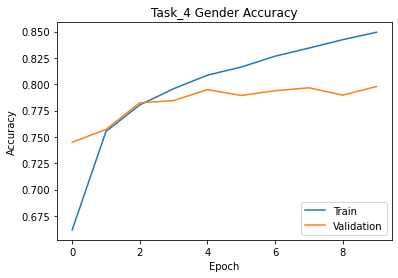

In [86]:
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['gender_output_accuracy'])
plt.plot(history.history['val_gender_output_accuracy'])
plt.title('Task_4 Gender Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [87]:
# Evaluate the model on the test set
model_combined.evaluate(x_test, {'gender_output': y_gender_val, 'race_output': y_race_val})

343/343 [==============================] - 1s 3ms/step - loss: 1.7400 - gender_output_loss: 0.4289 - race_output_loss: 1.3111 - gender_output_accuracy: 0.7938 - race_output_accuracy: 0.5003


[1.7399970293045044,
 0.4289242625236511,
 1.3110724687576294,
 0.7937739491462708,
 0.5002738833427429]

In [88]:
# Predict the labels for the validation data
y_val_pred = model_combined.predict(x_test)

# Predict the classes of the test set
y_val_gender_pred = np.argmax(y_val_pred[0], axis=1)
y_val_race_pred = np.argmax(y_val_pred[1], axis=1)

import numpy as np
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix for race prediction
gender_cm = confusion_matrix(np.argmax(y_gender_val, axis=1), y_val_gender_pred)


# Compute the confusion matrix for gender prediction
race_cm = confusion_matrix(np.argmax(y_race_val, axis=1), y_val_race_pred)

343/343 [==============================] - 1s 3ms/step


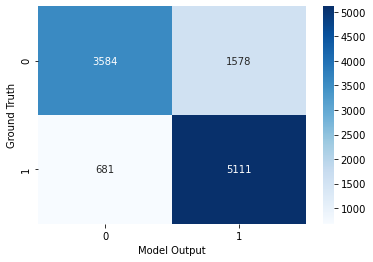

In [89]:
sns.heatmap(gender_cm, annot=True, cmap='Blues', fmt='d')
plt.ylabel('Ground Truth')
plt.xlabel('Model Output')
plt.show()

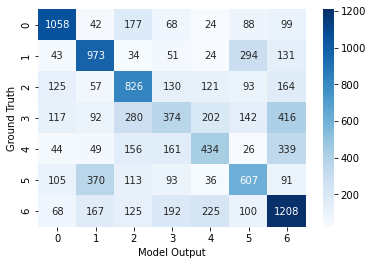

In [90]:
sns.heatmap(race_cm, annot=True, cmap='Blues', fmt='d')
plt.ylabel('Ground Truth')
plt.xlabel('Model Output')
plt.show()